# Using PCA and Kmeans on Iris dataset

Importing libraries

In [149]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import accuracy_score

Loading our dataset

In [150]:
iris=sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [151]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [152]:
# checking null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [153]:
# dividing dataset into target and data
iris_target=iris[['species']]

# dropping 'species' from the iris_data DataFrame
iris_data=iris.drop('species',axis=1)

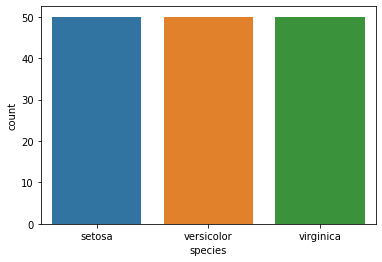

In [154]:
# Checking number of different species. 
sns.countplot(iris_target['species']) # all of them are same in number

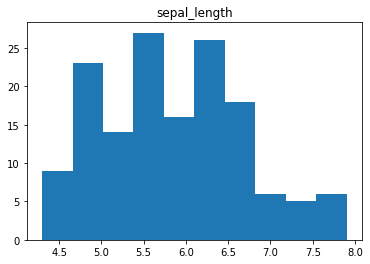

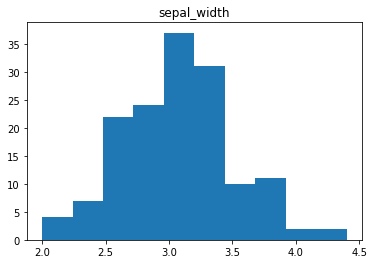

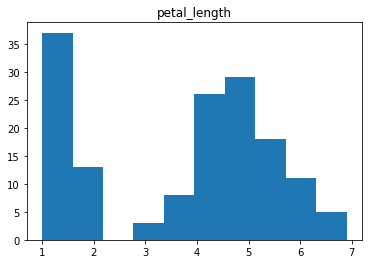

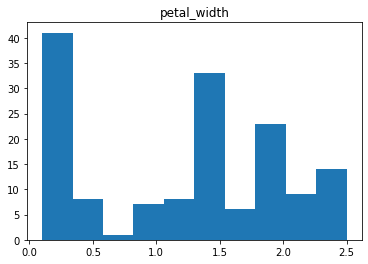

In [155]:
# plotting histograms for our numerical data. You can see how each column is distributed.

for i in iris_data:
    plt.hist(iris_data[i])
    plt.title(i)
    plt.show()

In [156]:
# splitting our dataset into test and train
X_train,X_test,Y_train,Y_test=train_test_split(iris_data,iris_target,test_size=0.2,random_state=0)

In [165]:
# Standardzing the data because we will use PCA
# PCA requires standardizing of data because if each column has different units it might give more weightage to something that
# is larger in value
ssc=StandardScaler()
X_train=ssc.fit_transform(X_train)
X_test=ssc.transform(X_test)

In [167]:
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [168]:
# checking variance explained by each pca.
# since 96.2% of variance is explained by just first two pca's we will keep them and drop the rest.
var=pca.explained_variance_ratio_
var[:2].sum()

0.962040110437113

In [179]:
X_train=np.delete(X_train,[2,3],axis=1)
X_test=np.delete(X_test,[2,3],axis=1)

In [180]:
# Before directly applying kmeans, let's find the optimal number of clusters for our dataset
error=[]
for i in range(1,10):
    kmean=KMeans(n_clusters=i)
    y_pred=kmean.fit_predict(X_train)
    error.append(kmean.inertia_) #kmean.inertia_ gives us min Sum of square error (SSE). The target of kmeans is to minimize this value

Text(0, 0.5, 'error')

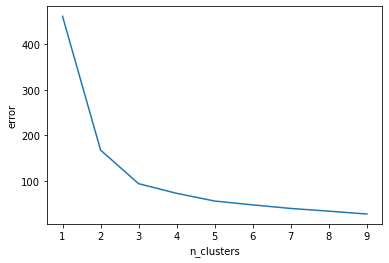

In [181]:
# plotting our errors for each number of clusters
# here we will apply elbow method which is nothing but choosing the value of n_clusters where the graph looks like an elbow.
plt.plot(range(1,10),error)
plt.xlabel("n_clusters")
plt.ylabel("error")

In [186]:
#using our model
kmean=KMeans(n_clusters=3)
kmean=kmean.fit(X_train)
y_pred=kmean.predict(X_test)

In [183]:
# since kmeans return integers not the value of our target variables, we will replace them with their integer value
Y_test['species']=Y_test['species'].replace({'setosa':1,'versicolor':2,'virginica':0})

C:\Users\13433\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We got an accuracy of 80%

In [187]:
accuracy_score(y_pred,Y_test)

0.8

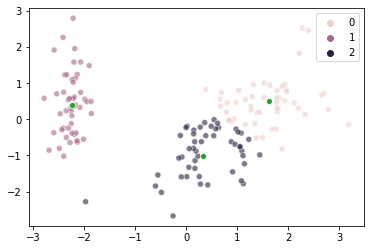

In [236]:
# plotting our data with clusters and their respective centroids
sns.scatterplot(X_test[:,0],X_test[:,1],hue=kmean.predict(X_test),legend=None,alpha=0.6)
sns.scatterplot(X_train[:,0],X_train[:,1],hue=kmean.predict(X_train),alpha=0.6)
sns.scatterplot(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1])